# Exploring KMeans Classification
### Olivier Kuhn de Chizelle
##### 10/25/2022


### Load Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris
pd.options.mode.chained_assignment = None

### Load and Explore Data

For this case, let us use the famous Iris Dataset. It is simple enough for us to see how Kmeans works

In [2]:
iris = load_iris(as_frame = True)
X = iris.data
y = iris.target
labels = iris.target_names
print(labels)

['setosa' 'versicolor' 'virginica']


In [3]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

__Let's build a 2dimensional DataFrame to perform and visualize Kmeans__

In [5]:
df = pd.DataFrame(data = {"x1":X["sepal length (cm)"], "x2":X["sepal width (cm)"], "label" : y})
df

,x1,x2,label
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


Text(0, 0.5, 'Sepal Width')

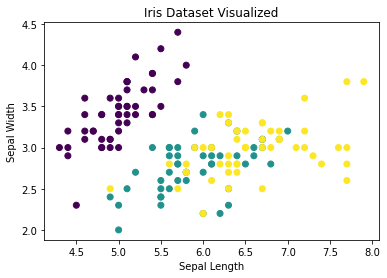

In [6]:
plt.scatter(df['x1'],df['x2'], c = df['label'])
plt.title("Iris Dataset Visualized")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

__NOTE:__
Our chosen subset of the Iris Dataset is __NOT LINEARLY SEPARABLE__. In other words, we can see an overlap between two distinct classes. This is not something that K-Means is able to handle properly. We will be able to observe this is in the rest of the notebook.

### Build K-Means Function

__Quick Review of the Kmeans Algorithm:__

calculate centroid of each class, and update each point to belong to the nearest centroid.
Repeat process as long as the centroids keep updating.
    

In [7]:
# Let's randomize the labels for our df 
import random

df["label"] = np.random.randint(low = 0, high = 3, size = df.shape[0])
df

,x1,x2,label
0,5.1,3.5,1
1,4.9,3.0,2
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,2
147,6.5,3.0,0
148,6.2,3.4,0


Text(0, 0.5, 'Sepal Width')

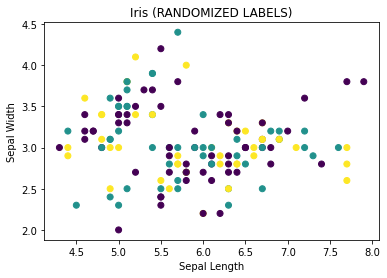

In [8]:
plt.scatter(df['x1'],df['x2'], c = df['label'])
plt.title("Iris (RANDOMIZED LABELS)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

In [9]:
# Write functions to perform K-Means

def euclidean_distance(point, centroid):
    distance = ((point['x1'] - centroid[0])**2 + (point['x2'] - centroid[1])**2)**0.5
    return distance 

def K_means(dataframe):
    updating = True
    iteration = 0
    while updating and iteration <= 1000:
        updating = False
        df1 = dataframe[dataframe["label"] == 0]
        df2 = dataframe[dataframe["label"] == 1]
        df3 = dataframe[dataframe["label"] == 2]
        centroid1 = [df1['x1'].mean(), df1['x2'].mean()]
        centroid2 = [df2['x1'].mean(), df2['x2'].mean()]
        centroid3 = [df3['x1'].mean(), df3['x2'].mean()]
        centroids = [centroid1, centroid2, centroid3]
        for i in range(df.shape[0]):
            point = dataframe.iloc[i]
            distances = []
            for centroid in centroids:
                distances.append(euclidean_distance(point, centroid))
            new_label = distances.index(min(distances))
            if new_label != point['label']:
                updating = True
                dataframe['label'][i] = new_label
                
        iteration += 1
    return dataframe 


In [10]:
# Run our Kmeans implementation on our Data!
KM_df = K_means(df)

Text(0, 0.5, 'Sepal Width')

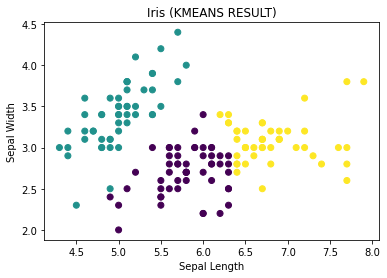

In [11]:
plt.scatter(KM_df['x1'],KM_df['x2'], c = KM_df['label'])
plt.title("Iris (KMEANS RESULT)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

### Conclusion

As you can see, the KMeans algorithm creates K distinct clumps in the data.

Note that it does not handle the case of non-linearly separable data such as our subset of the Iris Dataset.